In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
import torch
import plotly.express as px
import pandas as pd

In [3]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_word_embeddings(words):
    embeddings = []
    for word in words:
        inputs = tokenizer(word, return_tensors="pt")
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1)
        embeddings.append(embedding)
    return torch.cat(embeddings)


/Users/nmayilsa/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


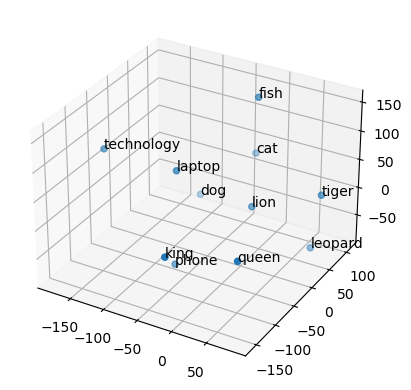

Similarity scores:
tensor([[1.0000, 0.9009, 0.7957, 0.9089, 0.9125, 0.8716, 0.8518, 0.8839, 0.7348,
         0.8727, 0.8840],
        [0.9009, 1.0000, 0.8354, 0.9102, 0.8760, 0.8519, 0.8320, 0.8496, 0.7498,
         0.8530, 0.8368],
        [0.7957, 0.8354, 1.0000, 0.8181, 0.7763, 0.7694, 0.7952, 0.7708, 0.7846,
         0.7692, 0.7409],
        [0.9089, 0.9102, 0.8181, 1.0000, 0.9263, 0.9197, 0.8653, 0.8633, 0.7569,
         0.9034, 0.9137],
        [0.9125, 0.8760, 0.7763, 0.9263, 1.0000, 0.9167, 0.8378, 0.8730, 0.7374,
         0.8713, 0.8910],
        [0.8716, 0.8519, 0.7694, 0.9197, 0.9167, 1.0000, 0.8395, 0.8282, 0.7282,
         0.8354, 0.8713],
        [0.8518, 0.8320, 0.7952, 0.8653, 0.8378, 0.8395, 1.0000, 0.8693, 0.7994,
         0.8272, 0.8258],
        [0.8839, 0.8496, 0.7708, 0.8633, 0.8730, 0.8282, 0.8693, 1.0000, 0.7617,
         0.8581, 0.8536],
        [0.7348, 0.7498, 0.7846, 0.7569, 0.7374, 0.7282, 0.7994, 0.7617, 1.0000,
         0.7447, 0.7252],
        [0.8727, 0

In [14]:
words = ["cat", "dog", "fish", "lion", "tiger", "leopard","laptop","phone","technology","king","queen"]


embeddings = get_word_embeddings(words)

tsne = TSNE(n_components=3, random_state=0, perplexity=5)
embeddings_3d = tsne.fit_transform(embeddings.detach().numpy())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2])

for i, word in enumerate(words):
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], word)

plt.show()

similarity_scores = torch.nn.functional.cosine_similarity(embeddings[:, None, :], embeddings[None, :, :], dim=-1)
print("Similarity scores:")
print(similarity_scores)


In [15]:
df = pd.DataFrame(embeddings_3d, columns=['x', 'y', 'z'])
df['word'] = words

fig = px.scatter_3d(df, x='x', y='y', z='z', text='word', size_max=10, opacity=0.7)
fig.update_traces(marker=dict(size=5))
fig.show()
